In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import copy
%matplotlib inline

## 1. Estimate the market returns per day

In [2]:
df = pd.read_csv(r'../data/fsp_case_31_BSD.csv', index_col =0,)# header = [0,1])
ret_idx = ['ret.'+str(i) for i in range(1,157)]
ret_idx.insert(0, 'ret')
company_returns = copy.deepcopy(df[ret_idx][1:].astype(float))

rename_idx = ["company."+ str(x) for x in range(157)]
company_returns.columns = rename_idx

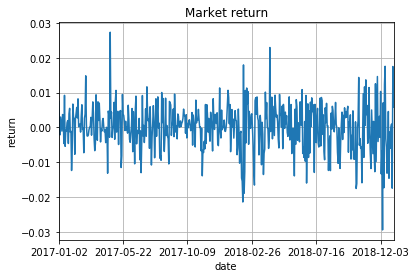

In [3]:
market_ret = company_returns.mean(axis=1)
market_ret.plot()
plt.grid()
plt.xlabel("date")
plt.ylabel("return")
plt.title("Market return")
plt.savefig("../result/2_4_1_a.eps",dpi=1200)

# 2. Estimate rolling beta with 22 days window

In [10]:
market_var = market_ret.rolling(22).std()
market_cov = company_returns.rolling(22).cov(market_ret)

print(market_var.size)
print(market_cov.columns)
betas = market_cov.divide(market_var)
# print(betas)

521
Index(['company.0', 'company.1', 'company.2', 'company.3', 'company.4',
       'company.5', 'company.6', 'company.7', 'company.8', 'company.9',
       ...
       'company.147', 'company.148', 'company.149', 'company.150',
       'company.151', 'company.152', 'company.153', 'company.154',
       'company.155', 'company.156'],
      dtype='object', length=157)


# 3. Estimate the cap-weighted market return

In [5]:
mcap_idx = ['mcap.'+str(i) for i in range(1,157)]
mcap_idx.insert(0, 'mcap')
company_cap = copy.deepcopy(df[mcap_idx][1:].astype(float))
cap_tot = company_cap.sum(axis=1)

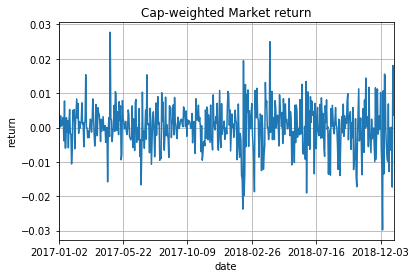

In [6]:
# print(company_returns)
rename_idx = ["company."+ str(x) for x in range(157)]
company_cap.columns = rename_idx
company_returns.columns = rename_idx

cap_weighted = company_cap.mul(company_returns, axis=1)
cap_weighted = cap_weighted.sum(axis=1)/cap_tot
cap_weighted.plot()
plt.grid()
plt.xlabel("date")
plt.ylabel("return")
plt.title("Cap-weighted Market return")
plt.savefig("../result/2_4_3_a.eps",dpi=1200)